**Kindly note**
I tried to a request from a twitter to get a developer account more than once, but my request was rejected 
 and I tried to do the project without him
hope find well in the project

# Data Wrangle Project - Norah ALsaeed

## Introduction 

in this project we will wrangle "WeRateDogs Twitter data " and we analysis and cleaning

#### Detiles 

- Gathering
- Assess
- Clleaning

### Loading Libraries 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import requests
import json

### Gather Data

#### Imorting Enhanced Twitter Archive 

In [14]:
dt_arr= pd.read_csv ("/Users/norah/Desktop/DAND/twitter-archive-enhanced.csv")

#### Downloading Tweet Image Perdiction 

In [24]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)



with open(url.split('/')[-1], mode = 'wb') as outfile:
    outfile.write(response.content)
    
imagesdf= pd.read_csv ('image-perdictions.tsv' , sep='\t')

#### Getting Tweet Data from Twitter API "udacity Code" 

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

#### Load and Download Json File

In [35]:
dftweet = pd.read_json('tweet-json.txt' , lines=True)

#### read data

In [29]:
imagesdf.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [30]:
print(imagesdf.info())
imagesdf.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None


2075

**NO MISSING VALUE in Image df it has 2075 rows**

In [31]:
#archieve
dt_arr.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [33]:
print(dt_arr.info())
dt_arr.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

2356

**We see in Archive has MISSING VALUE in some columns, it has 2356 entries**

In [34]:
## read json file
tweetdf.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [36]:
print(dftweet.info())
dftweet.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

2354

**As we see in dftweet are many MISSING VALUE there**
and. it is has 2354 rows

### Assessing Data

In [38]:
dt_arr.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [40]:
dt_arr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [45]:
imagesdf.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [114]:
imagesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [47]:
tweetdf.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [48]:
tweetdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st


## Quality issues :
- we have Missing Value in some cloumns 
- some of columns its not nessary like "qouted_ststus"
- we have a 181 retweets as indicated by retweeted_states_id 
- The type of Timestamp most be converted to be a date 
- its include of missing value should cleaning
- id type we will change it to be Object -- "in Archive DataFrame"
- id type we will change it to be Object -- " in Images DtaFrame"
- id type we will change it to be Object -- "in Tweet DataFrame"
- Some data, in which predictions of the absence of dogs such as fruits have nothing to do with the data,
    should be deleted
- The Id columns need to change the name to be id_tweet
-  some of columns it's not necessary , it must to drop it



## Tidness :
-  it shoud merage the stage of dogs into one column becuase its sepreated in many columns
- all the data is related but its divided into   three sperate dataframes, and will merage into one dataframe


# Cleanning

 ### Clean DataFrame " Copy"  
 I  make a copy to I can save thr original copy

In [506]:
clean_dt_arr = dt_arr.copy()
clean_imagesdf=imagesdf.copy()
clean_tweetdf=tweetdf.copy()

In [507]:
clean_dt_arr.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [511]:
clean_imagesdf.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [512]:
clean_tweetdf.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


### Clean Archive 

#### Define

will make cleaning to the retweeted tweets becuse we don't need it,its like dupliclted data and drop the colums we don't need it 

#### code

In [513]:
clean_dt_arr = clean_dt_arr [clean_dt_arr.retweeted_status_id.isnull()]
clean_dt_arr = clean_dt_arr[clean_dt_arr.retweeted_status_user_id.isnull()]
clean_dt_arr = clean_dt_arr[clean_dt_arr.retweeted_status_timestamp.isnull()]

In [514]:
clean_dt_arr = clean_dt_arr.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'])

#### Test

In [515]:
clean_dt_arr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ 

#### Define 

change tweet_id to string 

#### code

In [516]:
clean_dt_arr.tweet_id = clean_dt_arr.tweet_id.astype(str)

#### Test

In [517]:
clean_dt_arr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   object 
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 254.9+

#### Define 
change timestamp as datetime

#### code

In [518]:
clean_dt_arr.timestamp =pd.to_datetime(clean_dt_arr.timestamp)

#### Test

In [519]:
clean_dt_arr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   object             
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

#### Define 

for now we will merge columns into one column

#### code

In [520]:
clean_dt_arr.doggo.replace('None', '', inplace=True)
clean_dt_arr.floofer.replace('None', '', inplace=True)
clean_dt_arr.pupper.replace('None', '', inplace=True)
clean_dt_arr.puppo.replace('None', '', inplace=True)

# merge into column
clean_dt_arr['dog_stage'] = clean_dt_arr.doggo + clean_dt_arr.floofer + clean_dt_arr.pupper + clean_dt_arr.puppo

# handle multiple stages
clean_dt_arr.loc[clean_dt_arr.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
clean_dt_arr.loc[clean_dt_arr.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
clean_dt_arr.loc[clean_dt_arr.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
clean_dt_arr.loc[clean_dt_arr.dog_stage == '', 'dog_stage'] = np.nan

#### Test

In [521]:
clean_dt_arr.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
254,844580511645339650,NaN,NaN,2017-03-22 16:04:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He wants to know if you have ...,https://twitter.com/dog_rates/status/844580511...,11,10,Charlie,,,,,NaN


#### Define
drop the columns don't need id after stage_dogs

#### code

In [522]:
clean_dt_arr=clean_dt_arr.drop(columns=['doggo','floofer','pupper','puppo'])

In [524]:
clean_dt_arr.dog_stage.value_counts()

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

#### Define
drop the columns don't need id after stage_dogs

#### code

In [525]:
clean_dt_arr=clean_dt_arr.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','source','expanded_urls'])

#### test

In [526]:
clean_dt_arr.sample(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
2049,671504605491109889,2015-12-01 01:42:28+00:00,This is Charlie. He was just informed that dog...,11,10,Charlie,NaN


#### Clean Image 

#### Define
convert id type to string

#### code

In [527]:
clean_imagesdf.tweet_id = clean_imagesdf.tweet_id.astype(str)

#### test

In [528]:
clean_imagesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Define
As seen in the quality issues, we will extract the correct prediction for dogs, and delete the irrelevant data


#### code

In [529]:
DogStagePrediction = []
for index, row in clean_imagesdf.iterrows():
    if (row['p1_dog'] == True):
        DogStagePrediction.append(row['p1'])
    elif (row['p2_dog'] == True):
        DogStagePrediction.append(row['p2'])
    elif (row['p3_dog'] == True):
        DogStagePrediction.append(row['p3'])
    else: 
        DogStagePrediction.append('NaN')

In [530]:
clean_imagesdf['DogStagePrediction']= DogStagePrediction

#### test

In [531]:
clean_imagesdf.sample(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,DogStagePrediction
1564,793614319594401792,https://pbs.twimg.com/media/CvyVxQRWEAAdSZS.jpg,1,golden_retriever,0.705092,True,Labrador_retriever,0.219721,True,kuvasz,0.015965,True,golden_retriever


#### Define
remove Unneeded columns 


#### code

In [532]:
clean_imagesdf =clean_imagesdf.drop(columns=['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'])

#### test

In [533]:
clean_imagesdf.sample(1)

,tweet_id,jpg_url,DogStagePrediction
231,670411370698022913,https://pbs.twimg.com/media/CU3HlZtW4AAezbt.jpg,Maltese_dog


In [534]:
clean_imagesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2075 non-null   object
 1   jpg_url             2075 non-null   object
 2   DogStagePrediction  2075 non-null   object
dtypes: object(3)
memory usage: 48.8+ KB


In [281]:
#lets check if there any duplication in tweet_id :
clean_imagesdf.tweet_id.duplicated().sum()

0

### Clean Tweet DataFrame

In [282]:
clean_tweetdf.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


#### Define 
Rename id_str column to tweet_id,to more clearly


#### code

In [459]:
clean_tweetdf.rename(columns = {'id_str':'tweet_id'}, inplace = True)

#### Test

In [462]:
clean_tweetdf.sample(1)

,created_at,id,tweet_id,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1870,2015-12-11 02:54:12+00:00,675146535592706048,675146535592706048,This is Coops. He's yelling at the carpet. Not...,False,"[0, 98]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 675146530370822144, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1300,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


#### Define 
convert ID to be object

#### code

In [463]:
clean_tweetdf.tweet_id = clean_tweetdf.tweet_id.astype(str)

#### Test

In [464]:
clean_tweetdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   tweet_id                       2354 non-null   object             
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

#### Define 
 Remove unneeded columns to clean it

#### code

In [467]:
clean_tweetdf =clean_tweetdf.drop(columns=['created_at','entities','extended_entities','in_reply_to_status_id','coordinates','contributors','favorited','retweeted','geo','in_reply_to_screen_name','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','is_quote_status','lang','place','possibly_sensitive','possibly_sensitive_appealable','quoted_status','quoted_status_id','quoted_status_id_str','quoted_status_id_str','truncated','user'])

#### test

In [468]:
clean_tweetdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  2354 non-null   int64 
 1   tweet_id            2354 non-null   object
 2   full_text           2354 non-null   object
 3   display_text_range  2354 non-null   object
 4   source              2354 non-null   object
 5   retweet_count       2354 non-null   int64 
 6   favorite_count      2354 non-null   int64 
 7   retweeted_status    179 non-null    object
dtypes: int64(3), object(5)
memory usage: 147.2+ KB


In [290]:
#lets check if thier any duplicated in tweet_id
clean_tweetdf.tweet_id.duplicated().sum() 

0

#### Define

 will remove the Retweeted enteres because its like duplicat and we don't need it

#### code

In [470]:
clean_tweetdf=clean_tweetdf[clean_tweetdf.retweeted_status.isnull()]

#### Test

In [471]:
clean_tweetdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  2175 non-null   int64 
 1   tweet_id            2175 non-null   object
 2   full_text           2175 non-null   object
 3   display_text_range  2175 non-null   object
 4   source              2175 non-null   object
 5   retweet_count       2175 non-null   int64 
 6   favorite_count      2175 non-null   int64 
 7   retweeted_status    0 non-null      object
dtypes: int64(3), object(5)
memory usage: 152.9+ KB


#### Define
will delete a rows of retweeted,i think  we don't need to the column any more,so i will deleted to. more clearly data

#### code

In [472]:
clean_tweetdf=clean_tweetdf.drop(columns=['retweeted_status'])

#### Test

In [473]:
clean_tweetdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  2175 non-null   int64 
 1   tweet_id            2175 non-null   object
 2   full_text           2175 non-null   object
 3   display_text_range  2175 non-null   object
 4   source              2175 non-null   object
 5   retweet_count       2175 non-null   int64 
 6   favorite_count      2175 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 135.9+ KB


#### Define 
some columns also we dont need it 

#### code

In [474]:
clean_tweetdf=clean_tweetdf.drop(columns=['source','display_text_range'])

#### Test

In [476]:
clean_tweetdf.sample(1)

,id,tweet_id,full_text,retweet_count,favorite_count
619,796125600683540480,796125600683540480,#ImWithThor 13/10\nhttps://t.co/a18mzkhTf6,2079,5511


In [477]:
clean_dt_arr.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage_dogs
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN


In [479]:
clean_tweetdf.head()

,id,tweet_id,full_text,retweet_count,favorite_count
0,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,8853,39467
1,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,6514,33819
2,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,4328,25461
3,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,8964,42908
4,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,9774,41048


In [478]:
clean_imagesdf.head()

,tweet_id,jpg_url,DogStagePrediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher


## Creating Master dataframe 

In [405]:
#merge the cleaned enhanced twitter archive data 
master_df=pd.merge(clean_dt_arr, clean_tweetdf, on = 'tweet_id',how='left')
# With predictions 
master_df=pd.merge(clean_dt_arr, clean_imagesdf, on = 'tweet_id',how='left')

In [406]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   tweet_id              2175 non-null   object             
 1   timestamp             2175 non-null   datetime64[ns, UTC]
 2   text                  2175 non-null   object             
 3   rating_numerator      2175 non-null   int64              
 4   rating_denominator    2175 non-null   int64              
 5   name                  2175 non-null   object             
 6   stage_dogs            364 non-null    object             
 7   id_x                  1420 non-null   float64            
 8   full_text_x           1420 non-null   object             
 9   retweet_count_x       1420 non-null   float64            
 10  favorite_count_x      1420 non-null   float64            
 11  id_y                  1420 non-null   float64            
 12  full_t

In [318]:
master_df.to_csv('TWitter_archive_master.csv')

## Data Analysis and Visulisution

In [320]:
 master_df= pd.read_csv('TWitter_archive_master.csv')

In [321]:
master_df.head()

,Unnamed: 0,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage_dogs,id_x,full_text_x,retweet_count_x,favorite_count_x,id_y,full_text_y,retweet_count_y,favorite_count_y,jpg_url_x,DogStagePrediction_x,jpg_url_y,DogStagePrediction_y
0,0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN
1,1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
2,2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,8.918152e+17,This is Archie. He is a rare Norwegian Pouncin...,4328.0,25461.0,8.918152e+17,This is Archie. He is a rare Norwegian Pouncin...,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
3,3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,8.916896e+17,This is Darla. She commenced a snooze mid meal...,8964.0,42908.0,8.916896e+17,This is Darla. She commenced a snooze mid meal...,8964.0,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever
4,4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,8.913276e+17,This is Franklin. He would like you to stop ca...,9774.0,41048.0,8.913276e+17,This is Franklin. He would like you to stop ca...,9774.0,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset


### Relationship between Retweeet and favorate count

In [324]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Favorite Conut')

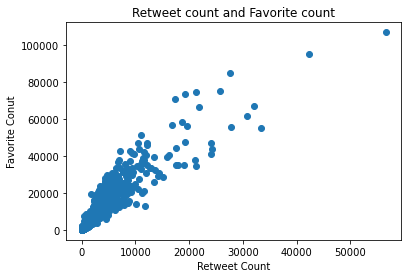

In [337]:
plt.scatter(master_df.retweet_count_x ,master_df.favorite_count_x)
plt.title("Retweet count and Favorite count")
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Conut')

#### Insight 

- it is look like a relationship between retweet count and favorite count

#### Top Five  Names

In [363]:
macount=master_df.name.value_counts()

Text(0, 0.5, 'Counts')

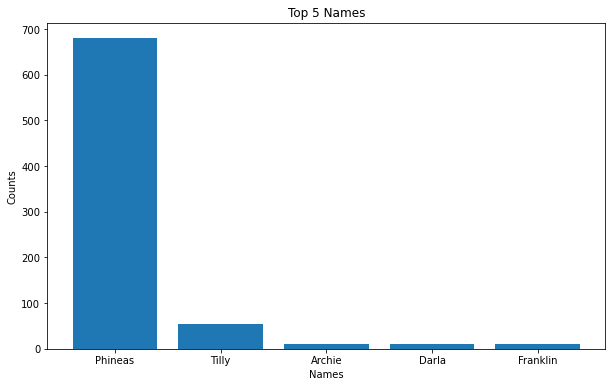

In [364]:
plt.subplots(figsize=(10,6))
plt.bar(master_df.name[:5],macount[:5])
plt.title('Top 5 Names')
plt.xlabel('Names')
plt.ylabel('Counts')

#### insight

- is appear a Phineas name it's more repeat between them

In [383]:
master_df.DogStagePrediction_y.value_counts()

golden_retriever        158
Labrador_retriever      108
Pembroke                 95
Chihuahua                91
pug                      62
                       ... 
standard_schnauzer        1
Scotch_terrier            1
clumber                   1
Bouvier_des_Flandres      1
Irish_wolfhound           1
Name: DogStagePrediction_y, Length: 113, dtype: int64

In [403]:
counts_DSP[:5]

[158, 108, 95, 91, 62]

In [374]:
DogStagePrediction_names = master_df['DogStagePrediction_x'].value_counts().keys().tolist()
counts_DSP = master_df['DogStagePrediction_x'].value_counts().tolist()

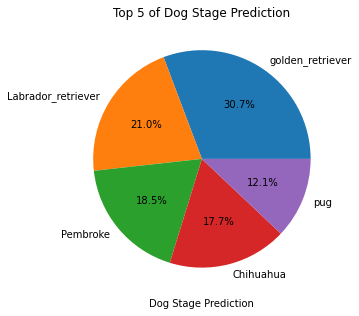

In [404]:
plt.figure(figsize=(10,5))
plt.pie(labels=DogStagePrediction_names[0:5],x=counts_DSP[0:5],autopct='%1.1f%%')
plt.xlabel('Dog Stage Prediction')
plt.title('Top 5 of Dog Stage Prediction')

plt.show()

### Insgit 
- we see the golden_retriever it take the hgiest percentage of them

# Conclusion


**Conclusion. In conclusion, Data Wrangling can assist in lowering the weight of the information evaluation method. It allows in locating out the maximum applicable records and, thereafter, helps the information evaluation method in order that the lesser time is fed on in bringing out the maximum reliable outcomes.**